# Problem Set 9

## Drell-Yan proton-proton cross secton

(Inspired by Klein and Godunov. I hope that I have given you enough information to solve the problem independent of your particle physics background. Please ask me for help if this is not the case.)

This is the simplist nontrival particle physics Monte Carlo cross section you can calculate. It simulates the Drell-Yan process: $p + p \to \gamma^* \to \ell^+ + \ell^- + X$, where $X$ is unobserved hadrons. But we will consider only the producton process, not the decay.


<div>
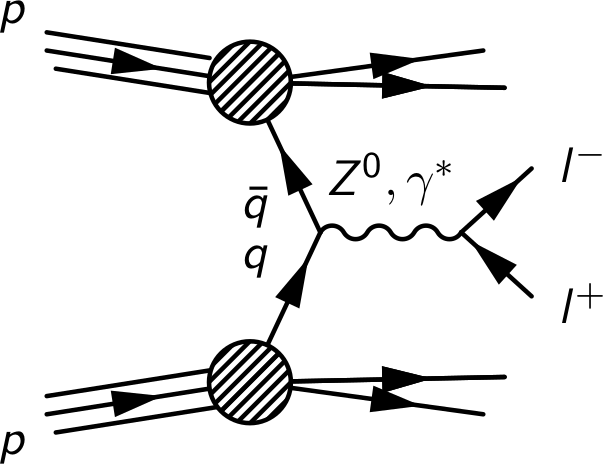
</div>

The first complication we encounter in simulating this process is protons $p$ do not interact to produce the photon $\gamma^*$, but rather the quarks $q$ within the protons interact to product the photon.
We consider the quarks that interact to have a fraction of the protons energy $x$.
To carry out the calculation, we need experimentally determined probability density functions (pdfs) for the probabilities that a quark of flavour $i$ has proton fractonal energy $x$.
There are many such libraries of parton distribution function available, all with different measurement, theortical assumptions, approximations, and modeling techquies. They can not currently be calculated from first principles.
For simplicity, we will consider only the $u$-quark, $d$-quark, and a single contribution from the sea quarks (anit-quarks).
We will take the quarks to be massless. 
The following three analytic models for the pdf's will be used.

\begin{equation}
q_u(x) = 2.13\sqrt{x}(1-x)^{2.8}, \quad
q_d(x) = 1.26\sqrt{x}(1-x)^{3.8}, \quad
\bar{q}(x) = q_\bar{u}(x) = q_\bar{d}(x) = 0.27(1-x)^{8.1}\, .
\end{equation}

**1)** Plot the pdfs and calculate their normalizations. Notice that the pdfs do not sum to 1 as we are not considering the gluon or other quark types in the proton.

Normalization factor for q_u:  4.297244991932882
Normalization factor for q_d:  10.13191284750522
Normalization factor for qbar:  33.703703703703695
Total probability of the three pdfs:  0.36107561059731874


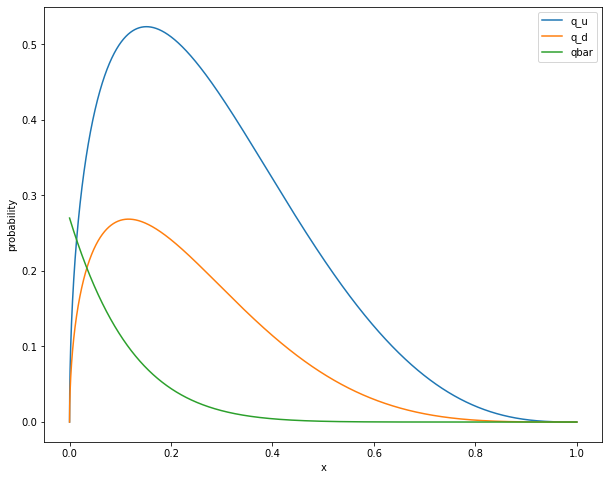

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def q_u(x):
    return 2.13*np.sqrt(x)*(1-x)**2.8
def q_d(x):
    return 1.26*np.sqrt(x)*(1-x)**3.8
def qbar(x):
    return 0.27*(1-x)**8.1
# normalizations
k_u, _ = quad(q_u, 0, 1)
k_d, _ = quad(q_d, 0, 1)
kbar, _ = quad(qbar, 0, 1)
#
print("Normalization factor for q_u: ", 1/k_u)
print("Normalization factor for q_d: ", 1/k_d)
print("Normalization factor for qbar: ", 1/kbar)
print('Total probability of the three pdfs: ', k_u + k_d + kbar)

N = 25000 #points
x = np.linspace(0, 1, num=N)
plt.figure(figsize=(10, 8))
plt.plot(x, q_u(x), label='q_u')
plt.plot(x, q_d(x), label='q_d')
plt.plot(x, qbar(x), label='qbar')
plt.xlabel('x')
plt.ylabel('probability')
plt.legend()

In general, the quark-antiquark scattering cross section needs to be convolved with each parton distribution function and summed over the different quark types. The simplicity of the Drell-Yan process is that the convolution is non-existent since the quark-antiquark scattering cross section does not depend directly on $x$. The Drell-Yan proton-proton differential cross section can be written as

\begin{equation}
\frac{d^2\sigma}{dx_1dx_2} = \frac{4\pi\alpha^2}{9q^2} \sum_{a=u,u,d} e_a^2 \left[ q_a(x_1) \bar{q}_a(x_2) + \bar{q}_a(x_1) q_a(x_2)\right]\, ,
\end{equation}

where we will take the convention that $x_1$ is for the quark from the proton traveling in the positive $z$-direction and $x_2$ is for the quark from the proton traveling in the negative $z$-direction. The coupling factor $4\pi\alpha^2/3$ shows that the process is electromagnetic (the $\alpha$) and a quark colour coupling factor (the $1/3$) has been included. $e_a^2$ is the electric charge of the quark of type $a$ in units of $e$, i.e. it is a simple fraction. $e_u = 2/3, e_d = -1/3, e_\bar{u} = -2/3, e_\bar{d} = 1/3$. The sum is over the "valence" quarks in a proton: two $u$-quarks and a $d$-quark.

**2)** Write a program to calculate this cross section $d^2\sigma/dx_1dx_2$. Sample the cross section over $x_1$ and $x_2$ to calculate the cross section as a function of $q^2 = sx_1x_2$, were $\sqrt{s} = 13600$ GeV. Take $\alpha = 1/137$. Plot the cross section over the range [1300,2000] GeV. What is your Monte Carlo efficieincy?

Monte Carlo efficiency:  0.09776
Successful trials:  4888
Total trials:  25000


Text(0.5, 1.0, '$q = [1300, 2000]$ GeV')

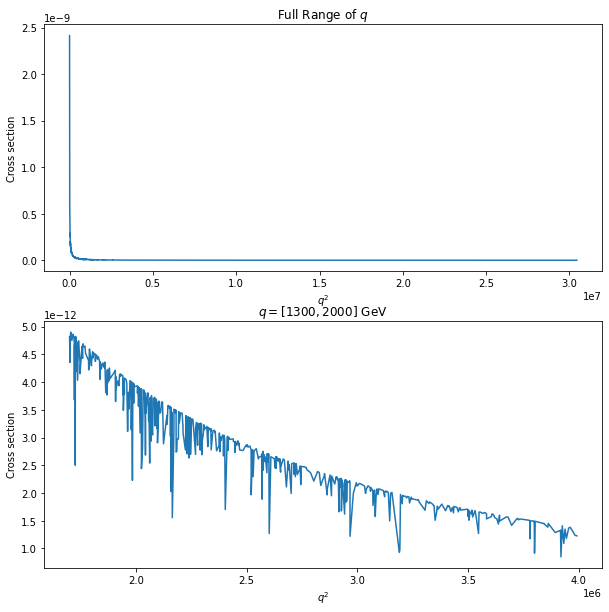

In [13]:
alpha = 1/137
s = 13600**2 # GeV^2
e_u = 2/3
e_d = -1/3
a = 0
b = 1
#
max_finder = np.linspace(a, b, num=N)
C1 = max(q_u(max_finder))
C2 = max(q_d(max_finder))
C3 = max(qbar(max_finder))
#
hit1 = 0
hit2 = 0

np.random.seed(0)

# accept-reject sampling for x1
q1x1 = [] # q_u(x1)
q2x1 = [] # q_d(x1)
q3x1 = [] # qbar(x1)
x1 = []
for _ in range(N):
    u = np.random.rand()
    v = np.random.rand()
    q1_hit = False
    q2_hit = False
    q3_hit = False
    if C1*v < q_u((b-a)*u+a):
        q1_hit = True
    if C2*v < q_d((b-a)*u+a):
        q2_hit = True
    if C2*v < qbar((b-a)*u+a):
        q3_hit = True
        
    if q1_hit and q2_hit and q3_hit:
        q1x1.append(q_u((b-a)*u+a))
        q2x1.append(q_d((b-a)*u+a))
        q3x1.append(qbar((b-a)*u+a))
        x1.append(u)
        hit1 +=1
    else:
        continue
# accept-reject sampling for x2
q1x2 = [] # q_u(x2)
q2x2 = [] # q_d(x2)
q3x2 = [] # qbar(x2)
x2 = []
for _ in range(N):
    u = np.random.rand()
    v = np.random.rand()
    q1_hit = False
    q2_hit = False
    q3_hit = False
    if C1*v < q_u((b-a)*u+a):
        q1_hit = True
    if C2*v < q_d((b-a)*u+a):
        q2_hit = True
    if C2*v < qbar((b-a)*u+a):
        q3_hit = True
        
    if q1_hit and q2_hit and q3_hit:
        q1x2.append(q_u((b-a)*u+a))
        q2x2.append(q_d((b-a)*u+a))
        q3x2.append(qbar((b-a)*u+a))
        x2.append(u)
        hit2 +=1
    else:
        continue
    
efficiency = (hit1+hit2)/(2*N) # average of x1 and x2 sampling
print('Monte Carlo efficiency: ', efficiency)
print('Successful trials: ', hit1+hit2)
print('Total trials: ', N)

# the x1 arrays generally won't be the same length as the x2 ones.
# matching the lengths:
if len(x1) < len(x2):
    diff = len(x2) - len(x1)
    q1x2 = q1x2[0:-diff]
    q2x2 = q2x2[0:-diff]
    q3x2 = q3x2[0:-diff]
    x2 = x2[0:-diff]
elif len(x2) < len(x1):
    diff = len(x1) - len(x2)
    q1x1 = q1x1[0:-diff]
    q2x1 = q2x1[0:-diff]
    q3x1 = q3x1[0:-diff]
    x1 = x1[0:-diff]

q_squared = s*np.multiply(x1, x2)
# array of terms in front of sum
A = (4*np.pi*alpha**2) / (9*q_squared)
# first sum term
S1 = e_u**2*(np.multiply(q1x1, q3x2) + np.multiply(q1x2, q3x1))
# second sum term
S2 = e_d**2*(np.multiply(q2x1, q3x2) + np.multiply(q2x2, q3x1))
# cross section
cross_section = np.multiply(A, 2*S1 + S2)
#
# sorting in ascending q^2
sorting = np.array(q_squared).argsort()
q_squared = np.array(q_squared)[sorting]
cross_section = np.array(cross_section)[sorting]

# indeces corresponding to q = [1300, 2000]GeV
for i in range(len(q_squared)):
    if q_squared[i] > 1300**2:
        low_ind = i
        break
for i in range(len(q_squared)):
    if q_squared[i] > 2000**2:
        up_ind = i
        break

fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].plot(q_squared, cross_section)
axs[0].set_xlabel(r'$q^2$')
axs[0].set_ylabel('Cross section')
axs[0].set_title(r'Full Range of $q$')
axs[1].plot(q_squared[low_ind:up_ind], cross_section[low_ind:up_ind])
axs[1].set_xlabel(r'$q^2$')
axs[1].set_ylabel('Cross section')
axs[1].set_title(r'$q = [1300, 2000]$ GeV')

The above cross section is an electromagentic process in which a virtual photon is exchanged. Now include the electroweak interacton involving Z-boson exchange ($Z^0$ in the diagram above). 

**3)** Add the following Briet-Wigner distribution along with the $1/q^2$ term in the formula above so that the cross section has two terms.

\begin{equation}
\sigma_\mathrm{BW}(M) \sim \frac{M_Z \Gamma_Z}{(M^2 - M_Z^2)^2 + (M_Z \Gamma_Z)^2}\, ,
\end{equation}

where $M_Z = 91.2$ GeV and $\Gamma_Z = 2.5$ GeV. Notice that $q^2 = M^2$, these are just different symbol conventions.
We will (incorrectly) take the coupling for the two processes to be equal and ignore the quantum mechanical interference between them.
To make the Z-boson contribution prominant use $\sqrt{s} = 1000$ GeV, and plot over the range [5,200] GeV. What is your Monte Carlo efficiency?

Monte Carlo efficiency:  0.09776


Text(0.5, 1.0, '$q = [5, 200]$ GeV')

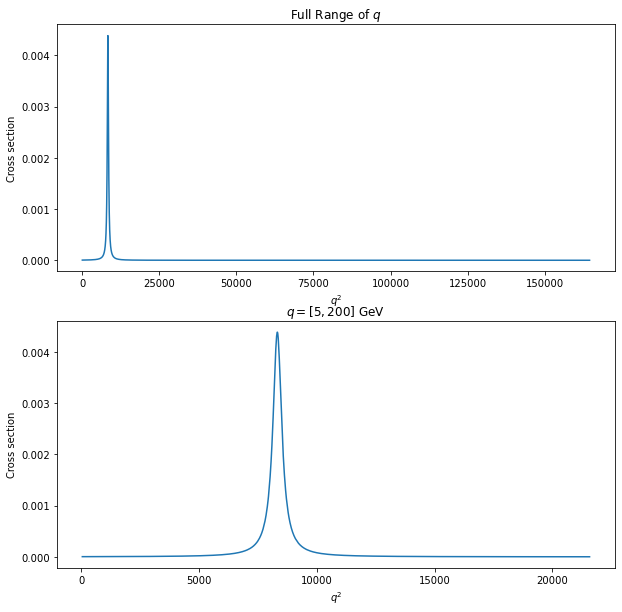

In [14]:
M_Z = 91.2 # GeV
Gamma_Z = 2.5 # GeV
s = 1000**2 # GeV^2

q_squared = s*np.multiply(x1, x2)
sigma_BW = (M_Z*Gamma_Z) / ((q_squared - M_Z**2)**2 + (M_Z*Gamma_Z)**2)
cross_section = np.multiply(A, 2*S1+S2) + sigma_BW

# I used the same sampling of x1 and x2 for q_squared and the sum term of the cross section so the Monte Carlo
# efficiency is the same as in (2).
print("Monte Carlo efficiency: ", efficiency)

# sorting in ascending q^2
sorting = np.array(q_squared).argsort()
q_squared = np.array(q_squared)[sorting]
cross_section = np.array(cross_section)[sorting]

# indeces corresponding to [5, 200]GeV
for i in range(len(q_squared)):
    if q_squared[i] > 5**2:
        low_ind = i
        break
for i in range(len(q_squared)):
    if q_squared[i] > 500**2:
        up_ind = i
        break

fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].plot(q_squared, cross_section)
axs[0].set_xlabel(r'$q^2$')
axs[0].set_ylabel('Cross section')
axs[0].set_title(r'Full Range of $q$')
axs[1].plot(q_squared[low_ind:up_ind], cross_section[low_ind:up_ind])
axs[1].set_xlabel(r'$q^2$')
axs[1].set_ylabel('Cross section')
axs[1].set_title(r'$q = [5, 200]$ GeV')